In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import librosa
import librosa.display
import IPython.display as ipd 

# Exctract data from titles

## Get file names

In [3]:
# Use relative file path to get directory of files"
path = "../raw_data/1-24 Audio Song and speech"

# Use os library to get file_names
directories = os.listdir(path)

### Process each filename to create arrays with important elements

In [4]:
# Initialize empty arrays for each field
speech_song = []
emotion = []
intensity = []
statement = []
repetitions = []
actor_id = []
gender = []

# Use for loop to process each file name.
for file in directories:
    f = file[0:-4]
    f = f.split("-")
    speech_song.append(f[1])
    emotion.append(f[2])
    intensity.append(f[3])
    statement.append(f[4])
    repetitions.append(f[5])
    actor_id.append(f[6])
    gender.append(int(f[6]) % 2)

In [5]:
# Create the empty data frame.
df = pd.DataFrame()

# Create the columns in the dataframe using arrays
df["speech_song"] = speech_song
df["emotion"] = emotion
df["intensity"] = intensity
df["statement"] = statement
df["repetitions"] = repetitions
df["actor_id"] = actor_id
df["gender"] = gender

In [6]:
# Create a gender in string version
df["gender_s"] = df["gender"].apply(lambda x: "Male" if x == 1 else "Female")


# Create an emotion dict to map the emotions
emotion_dict = {"01":"Neutral", "02":"Calm", "03":"Happy", "04":"Sad", "05":"Angry", "06":"Fearful"}

#Create a string column of the emotions and map them to emotion_dict
df["emotion_s"] = df["emotion"].map(emotion_dict)

# Get a dummies df of the emotions_strings
dummies = pd.get_dummies(df["emotion_s"])

# Horizontally concat the dummies df with original df.
df = pd.concat([df, dummies], axis=1)

df

,speech_song,emotion,intensity,statement,repetitions,actor_id,gender,gender_s,emotion_s,Angry,Calm,Fearful,Happy,Neutral,Sad
0,01,06,01,02,02,02,0,Female,Fearful,0,0,1,0,0,0
1,01,05,01,02,01,16,0,Female,Angry,1,0,0,0,0,0
2,02,03,02,02,02,16,0,Female,Happy,0,0,0,1,0,0
3,02,03,02,02,02,02,0,Female,Happy,0,0,0,1,0,0
4,01,06,01,02,02,16,0,Female,Fearful,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,02,04,01,01,02,23,1,Male,Sad,0,0,0,0,0,1
2064,01,02,02,01,01,23,1,Male,Calm,0,1,0,0,0,0
2065,01,02,01,02,01,23,1,Male,Calm,0,1,0,0,0,0
2066,02,04,02,02,02,23,1,Male,Sad,0,0,0,0,0,1


In [7]:
pip freeze | grep librosa

librosa==0.8.0
Note: you may need to restart the kernel to use updated packages.


In [8]:
audio_01_file = "03-01-01-01-01-01-01.wav"

In [9]:
# ipd.Audio(audio_01_file)

## Load files with librosa

In [10]:
path = '/Users/franbaiz/code/franbaiz/VoiceRecon/raw_data/1-24 Audio Song and speech'

#Load all files in an array 

In [110]:
signals = []
counter = 0
for files in directories:
    print(counter)
    loaded_file, _ = librosa.load(path + "/" + file)
    signals.append(loaded_file)
    counter += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [11]:
y, sr = librosa.load(path + '/03-01-01-01-01-01-01.wav')

In [54]:
y, sr = librosa.load(path +'/03-01-05-01-01-01-01.wav')

In [84]:
y, sr = librosa.load(path +'/03-01-01-01-02-01-01.wav')

In [80]:
y, sr = librosa.load(path +'/03-01-05-01-02-01-01.wav')

In [12]:
ipd.Audio(path + '/03-01-01-01-01-01-01.wav')

In [109]:
ipd.Audio(path + '/03-01-05-01-02-01-01.wav')

In [13]:
y.shape

(72838,)

In [14]:
hop_length = 512

In [15]:
frame_size = 2048

In [85]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [86]:
# Compute MFCC features from the raw signal
mfccs = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

In [87]:
mfccs

array([[-849.44543  , -848.0037   , -844.9774   , ..., -848.6928   ,
        -849.8391   , -848.29706  ],
       [   9.397482 ,   11.429262 ,   15.643802 , ...,   10.440815 ,
           8.833701 ,   11.016566 ],
       [   9.257885 ,   11.26843  ,   15.306116 , ...,   10.239193 ,
           8.674679 ,   10.861981 ],
       ...,
       [   5.630004 ,    6.96719  ,    8.187763 , ...,    5.3383904,
           5.194663 ,    6.6946974],
       [   5.0250854,    6.221458 ,    7.1440206, ...,    4.5887356,
           4.6790123,    5.964162 ],
       [   4.4280586,    5.474736 ,    6.176177 , ...,    3.8695192,
           4.166893 ,    5.2295103]], dtype=float32)

In [58]:
mfccs.shape

(13, 167)

#Visual MFCC

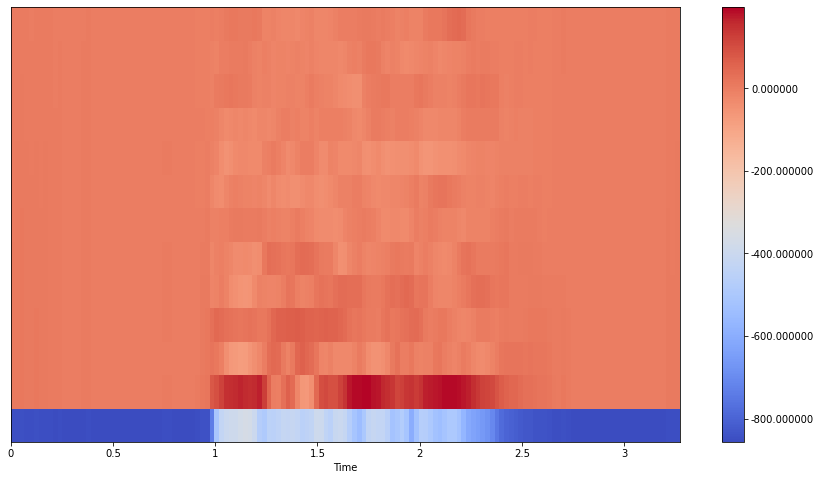

In [88]:
plt.figure(figsize=(15,8))
librosa.display.specshow(mfccs,
                        x_axis='time',
                        sr=sr  
                        )
plt.colorbar(format='%2f')
plt.show()

#Calculate delta and delta2 MFCCS

In [89]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [22]:
delta_mfccs.shape

(13, 143)

In [23]:
mfccs.shape

(13, 143)

In [24]:
delta2_mfccs.shape

(13, 143)

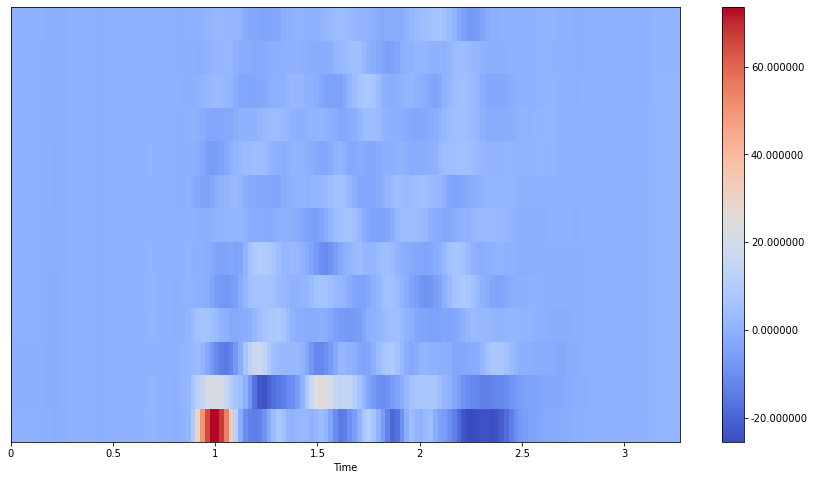

In [91]:
plt.figure(figsize=(15,8))
librosa.display.specshow(delta_mfccs,
                        x_axis='time',
                        sr=sr  
                        )
plt.colorbar(format='%2f')
plt.show()

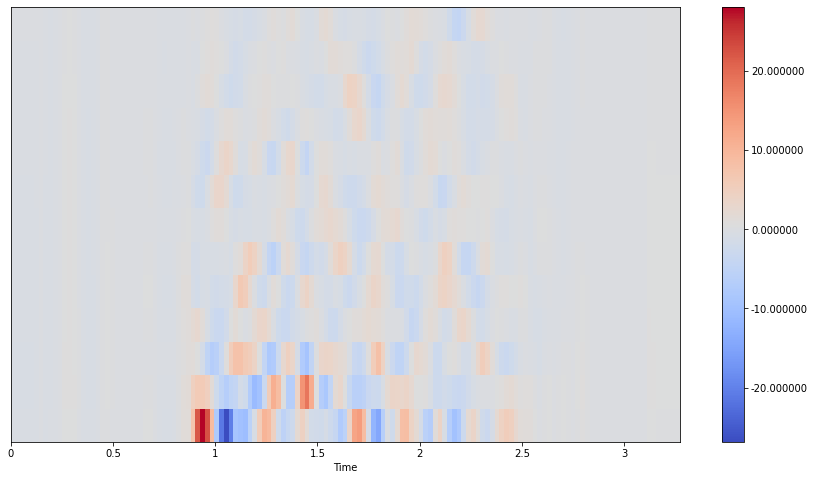

In [92]:
plt.figure(figsize=(15,8))
librosa.display.specshow(delta2_mfccs,
                        x_axis='time',
                        sr=sr  
                        )
plt.colorbar(format='%2f')
plt.show()

In [27]:
mfccs.dtype

dtype('float32')

In [93]:
mfccs_int = mfccs.astype(int)

In [29]:
delta_mfccs.dtype

dtype('float32')

In [94]:
delta_mfccs_int = delta_mfccs.astype(int)

In [31]:
delta2_mfccs.dtype

dtype('float32')

In [95]:
delta2_mfccs_int = delta2_mfccs.astype(int)

In [33]:
# comprehensive_mfccs = np.concatenate(mfccs_int, delta_mfccs_int, delta2_mfccs_int)

## Band Energy Ratio

#Extract spectograms

In [96]:
audio_01_file = np.array(y)

In [97]:
audio_01_file_spec = librosa.stft(y, n_fft=frame_size, hop_length=hop_length)

In [98]:
audio_01_file_spec.shape

(1025, 141)

In [99]:
spectogram = audio_01_file_spec

In [100]:
audio_01_file_spec_transpose = audio_01_file_spec.T

In [101]:
audio_01_file_spec_transpose.shape

(141, 1025)

#Calculate Band Energy Ratio

In [102]:
def calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate):
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / spectogram.shape[0]
    split_frequency_bin = np.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)
    

In [103]:
split_frequency_bin = calculate_split_frequency_bin(audio_01_file_spec, 2000, 22050)
split_frequency_bin

185

In [104]:
def calculate_band_energy_ratio(spectogram, split_frequency, sample_rate):
    split_frequency_bin = calculate_split_frequency_bin(spectogram, split_frequency, sample_rate)
    
    #move to the power of spectogram
    power_spec = np.abs(spectogram) ** 2
    power_spec = power_spec.T
    
    band_energy_ratio = []
    
    #Calculate BER for each frame
    for frequencies_in_frame in power_spec:
        sum_power_low_frequencies = np.sum(frequencies_in_frame[:split_frequency_bin])
        sum_power_high_frequencies = np.sum(frequencies_in_frame[split_frequency_bin:])
        ber_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        
        band_energy_ratio.append(ber_current_frame)
    
    return np.array(band_energy_ratio)
        

In [105]:
ber_audio_01_file = calculate_band_energy_ratio(audio_01_file_spec,2000, sr)

In [75]:
ber_audio_01_file.shape

(167,)

## Visualize Band Energy Ratio curves

In [106]:
frames = range(len(ber_audio_01_file)) 
t = librosa.frames_to_time(frames, hop_length=hop_length)


In [107]:
t

array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
       0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
       0.23219955, 0.2554195 , 0.27863946, 0.30185941, 0.32507937,
       0.34829932, 0.37151927, 0.39473923, 0.41795918, 0.44117914,
       0.46439909, 0.48761905, 0.510839  , 0.53405896, 0.55727891,
       0.58049887, 0.60371882, 0.62693878, 0.65015873, 0.67337868,
       0.69659864, 0.71981859, 0.74303855, 0.7662585 , 0.78947846,
       0.81269841, 0.83591837, 0.85913832, 0.88235828, 0.90557823,
       0.92879819, 0.95201814, 0.9752381 , 0.99845805, 1.021678  ,
       1.04489796, 1.06811791, 1.09133787, 1.11455782, 1.13777778,
       1.16099773, 1.18421769, 1.20743764, 1.2306576 , 1.25387755,
       1.27709751, 1.30031746, 1.32353741, 1.34675737, 1.36997732,
       1.39319728, 1.41641723, 1.43963719, 1.46285714, 1.4860771 ,
       1.50929705, 1.53251701, 1.55573696, 1.57895692, 1.60217687,
       1.62539683, 1.64861678, 1.67183673, 1.69505669, 1.71827

In [51]:
len(t)

143

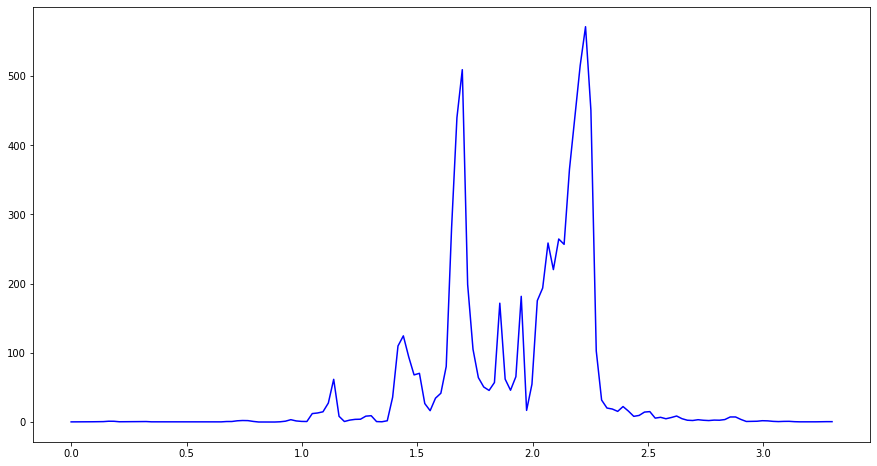

In [53]:
plt.figure(figsize=(15,8))

plt.plot(t, ber_audio_01_file, color='b')

plt.show()

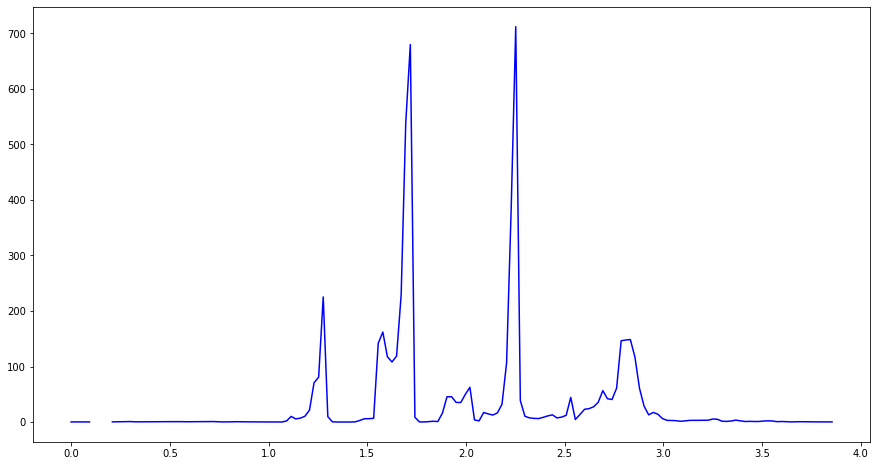

In [78]:
plt.figure(figsize=(15,8))

plt.plot(t, ber_audio_01_file, color='b')

plt.show()

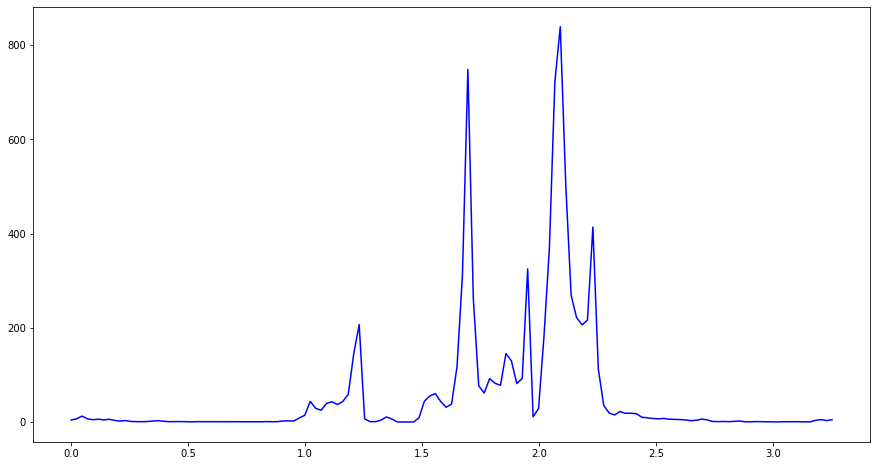

In [108]:
plt.figure(figsize=(15,8))

plt.plot(t, ber_audio_01_file, color='b')

plt.show()

In [111]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [112]:
beat_mfcc_delta = librosa.util.sync(np.vstack([mfccs, delta_mfccs]),
                                    beat_frames)

In [115]:
beat_mfcc_delta

array([[-8.4984015e+02, -8.2615430e+02, -6.2557013e+02],
       [ 8.8392553e+00,  1.1500083e+01,  8.0672173e+01],
       [ 8.7013483e+00,  2.6886635e+00, -2.3171074e+00],
       [ 8.4786015e+00,  5.3098536e+00,  1.7574087e+01],
       [ 8.1786385e+00,  9.9320561e-01,  5.9834747e+00],
       [ 7.8085742e+00,  5.3623545e-01,  9.5129156e-01],
       [ 7.3751187e+00,  4.9352169e-01, -4.6844454e+00],
       [ 6.8863983e+00, -1.8940820e+00, -7.7316742e+00],
       [ 6.3536692e+00, -9.7959280e-01, -1.6158426e+01],
       [ 5.7912774e+00, -7.0429653e-02, -5.6725478e+00],
       [ 5.2145333e+00,  7.5705910e-01, -5.6993037e-01],
       [ 4.6370068e+00, -6.7982465e-02, -4.3198934e+00],
       [ 4.0691204e+00,  4.9301091e-01,  1.5591602e+00],
       [-5.7524198e-01,  1.1562081e+01, -3.8005459e+00],
       [-8.0784422e-01,  3.7614918e+00, -1.1786741e+00],
       [-7.9136920e-01, -8.4315395e-01,  3.5479537e-01],
       [-7.6533455e-01,  8.6839867e-01, -2.1801449e-01],
       [-7.3103917e-01, -6.4299

In [116]:
beat_mfcc_delta.shape

(26, 3)

In [117]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)


In [118]:
beat_times

array([0.30185941, 1.04489796])

In [119]:
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

In [120]:
chromagram

array([[0.10907178, 0.10293272, 0.10622101, ..., 0.49365464, 0.45685494,
        0.46609125],
       [0.19682495, 0.20123687, 0.20044592, ..., 0.5724094 , 0.59928995,
        0.60732913],
       [0.18687943, 0.1847141 , 0.18578091, ..., 0.6076636 , 0.66932225,
        0.71829873],
       ...,
       [0.304464  , 0.31042582, 0.304454  , ..., 0.55294037, 0.5928435 ,
        0.60670114],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.9812638 ],
       [0.08763766, 0.08835365, 0.09794122, ..., 0.4253267 , 0.3636285 ,
        0.39931032]], dtype=float32)

In [121]:
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

In [122]:
beat_chroma

array([[0.12372649, 0.49395186, 0.44146395],
       [0.17582376, 0.190875  , 0.37502465],
       [0.21814166, 0.20878959, 0.19397524],
       [0.32714847, 0.30732328, 0.28053802],
       [0.21285084, 0.19946215, 0.21552423],
       [0.28769198, 0.18062475, 0.30302066],
       [0.2626884 , 0.217345  , 0.5295013 ],
       [0.2240523 , 0.26192787, 0.40030354],
       [0.25317815, 0.28756496, 0.57747805],
       [0.34942675, 0.4529338 , 0.5645455 ],
       [1.        , 0.7759365 , 0.4122474 ],
       [0.15136768, 1.        , 0.3194399 ]], dtype=float32)

In [123]:
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [124]:
beat_features

array([[ 1.23726495e-01,  4.93951857e-01,  4.41463947e-01],
       [ 1.75823763e-01,  1.90874994e-01,  3.75024647e-01],
       [ 2.18141660e-01,  2.08789587e-01,  1.93975240e-01],
       [ 3.27148467e-01,  3.07323277e-01,  2.80538023e-01],
       [ 2.12850839e-01,  1.99462146e-01,  2.15524226e-01],
       [ 2.87691981e-01,  1.80624753e-01,  3.03020656e-01],
       [ 2.62688398e-01,  2.17344999e-01,  5.29501319e-01],
       [ 2.24052295e-01,  2.61927873e-01,  4.00303543e-01],
       [ 2.53178149e-01,  2.87564963e-01,  5.77478051e-01],
       [ 3.49426746e-01,  4.52933788e-01,  5.64545512e-01],
       [ 1.00000000e+00,  7.75936484e-01,  4.12247390e-01],
       [ 1.51367679e-01,  1.00000000e+00,  3.19439888e-01],
       [-8.49840149e+02, -8.26154297e+02, -6.25570129e+02],
       [ 8.83925533e+00,  1.15000830e+01,  8.06721725e+01],
       [ 8.70134830e+00,  2.68866348e+00, -2.31710744e+00],
       [ 8.47860146e+00,  5.30985355e+00,  1.75740871e+01],
       [ 8.17863846e+00,  9.93205607e-01